# Análise e exploração dos dados

Nesse notebook serão realizadas as análises e exploração do dataset criado no Notebook 1 – Coleta e Processamento-Tratamento dos Dados, com o uso da biblioteca gráfica matplotlib.pyplot

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

* Importação do dataset gerado no Notebook 1 – Coleta e Processamento-Tratamento dos Dados 

O dataset dadostratados.csv deve permanecer na pasta: C:\TCC\DATASETS

In [2]:
#Diretório e leitura do dataset
path = r'C:\TCC\DATASETS\dadostratados.csv'
#Importação na codificação "utf-8"
df = pd.read_csv(path, sep = ',', decimal=",", encoding = "utf-8",index_col=0)
#Mostrando as 05 primeiras colunas
df.head()

,br,causa_acidente,condicao_metereologica,dia_semana,fase_dia,pessoas,sentido_via,tipo_acidente,tipo_pista,tracado_via,...,veiculos,tipo_veiculo,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,sexo,ano,mes,hora,faixa_etaria
0,101,outras,ceu claro,segunda,pleno dia,3,Crescente,colisão transversal,Dupla,Reta,...,2,caminhão,1997,Condutor,ileso,masculino,2011,10,11,[15-24]
1,101,outras,ceu claro,segunda,pleno dia,3,Crescente,colisão transversal,Dupla,Reta,...,2,motocicleta,2008,Condutor,ferido grave,masculino,2011,10,11,[25-34]
2,101,outras,ceu claro,segunda,pleno dia,3,Crescente,colisão transversal,Dupla,Reta,...,2,motocicleta,2008,Passageiro,ferido grave,feminino,2011,10,11,Ignorada
3,381,outras,sol,sexta,amanhecer,1,Decrescente,saída de pista,Dupla,Reta,...,1,caminhão-trator,1997,Condutor,ileso,masculino,2011,10,6,[55-64]
4,407,falta de atenção,ceu claro,sexta,pleno dia,3,Crescente,colisão traseira,Simples,Reta,...,3,automóvel,2002,Condutor,ileso,masculino,2011,10,16,[25-34]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2704727 entries, 0 to 2704814
Data columns (total 22 columns):
br                        int64
causa_acidente            object
condicao_metereologica    object
dia_semana                object
fase_dia                  object
pessoas                   int64
sentido_via               object
tipo_acidente             object
tipo_pista                object
tracado_via               object
uf                        object
uso_solo                  object
veiculos                  int64
tipo_veiculo              object
ano_fabricacao_veiculo    int64
tipo_envolvido            object
estado_fisico             object
sexo                      object
ano                       int64
mes                       int64
hora                      int64
faixa_etaria              object
dtypes: int64(7), object(15)
memory usage: 474.6+ MB


##### Quantidade de vítimas acidentadas por ano

Text(0, 0.5, 'Quantidade de vítimas')

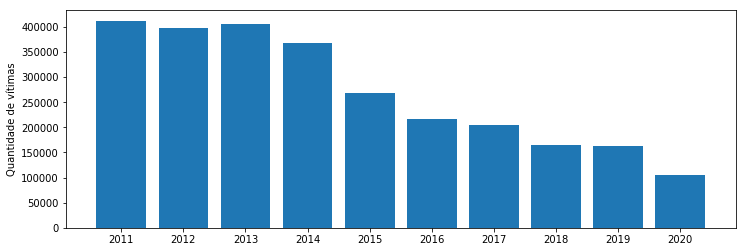

In [4]:
acidentes_por_ano = df.ano.value_counts()

plt.figure(figsize=(12,4))
plt.bar(np.arange(10), acidentes_por_ano.sort_index())
ticks = plt.xticks(np.arange(10), [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
plt.ylabel('Quantidade de vítimas')

#### Quantidade de vítimas acidentadas nesses 10 anos, de acordo com o seu estado físico

ileso           0.648323
ferido leve     0.244788
ferido grave    0.081824
óbito           0.025065
Name: estado_fisico, dtype: float64

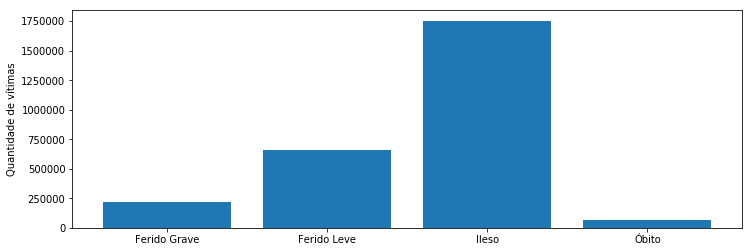

In [5]:
acidentes_por_estado_fisico = df.estado_fisico.value_counts()

plt.figure(figsize=(12,4))
plt.bar(np.arange(4), acidentes_por_estado_fisico.sort_index())
ticks = plt.xticks(np.arange(4), ['Ferido Grave','Ferido Leve','Ileso','Óbito'])
plt.ylabel('Quantidade de vítimas')
df['estado_fisico'].value_counts(normalize=True)

#### Evolução ano a ano das vítimas

In [6]:
tipo_acidente_por_ano = df.groupby(['estado_fisico', 'ano']).size().unstack()
tipo_acidente_por_ano['estado_fisico'] = tipo_acidente_por_ano.index
tipo_acidente_por_ano.head()

ano,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,estado_fisico
estado_fisico,,,,,,,,,,,
ferido grave,29051,28291,26962,26239,22508,21423,18718,17706,18573,11841,ferido grave
ferido leve,77776,76177,76848,74604,67743,65250,65607,58941,60500,38638,ferido leve
ileso,296780,283780,293584,259451,171934,123191,113843,82883,77866,50226,ileso
óbito,8675,8663,8426,8235,6867,6398,6248,5271,5333,3677,óbito


#### Quantidade de vítimas acidentadas por mês

Text(0, 0.5, 'Quantidade de vítimas')

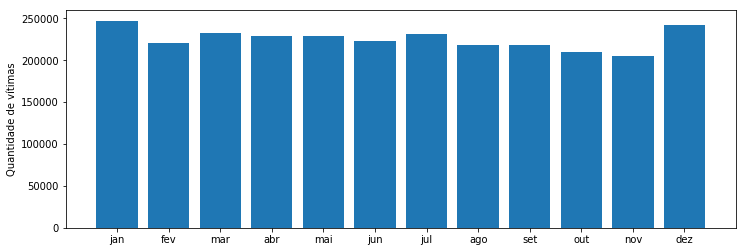

In [7]:
acidentes_por_mes = df.mes.value_counts()

plt.figure(figsize=(12,4))
plt.bar(np.arange(12), acidentes_por_mes.sort_index())
ticks = plt.xticks(np.arange(12), ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'])
plt.ylabel('Quantidade de vítimas')

In [8]:
grouped = df.groupby(['mes', 'estado_fisico']).size().unstack()
grouped = grouped.sort_values(['óbito'], ascending=[False])
grouped

estado_fisico,ferido grave,ferido leve,ileso,óbito
mes,,,,
12,19793,60862,155156,6211
7,19123,56001,149561,6086
5,18723,53968,150163,5839
9,18826,54975,138130,5828
8,18815,55283,138530,5797
3,18640,55798,152682,5680
1,18996,60306,162228,5677
6,18650,53455,144635,5672
4,17917,55077,151003,5384


#### Quantidade de vítimas acidentadas por estado

Os dez Estados com mais vítimas de trânsito:
MG    360459
PR    300127
SC    284992
RJ    221061
RS    208678
SP    182161
BA    158397
GO    127010
PE    112548
ES    110132
Name: uf, dtype: int64


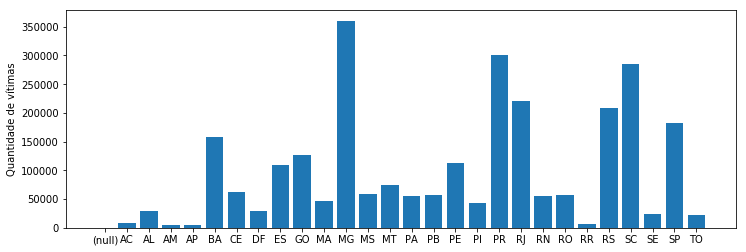

In [9]:
acidentes_por_estado = df.uf.value_counts()

plt.figure(figsize=(12,4))
plt.bar(np.arange(28), acidentes_por_estado.sort_index())
ticks = plt.xticks(np.arange(28), ['(null)','AC','AL','AM','AP','BA','CE','DF','ES','GO','MA','MG','MS','MT','PA','PB','PE','PI','PR','RJ','RN','RO','RR','RS','SC','SE','SP','TO'])
plt.ylabel('Quantidade de vítimas')
print('Os dez Estados com mais vítimas de trânsito:')
print(df['uf'].value_counts().nlargest(10))

In [10]:
grouped = df.groupby(['uf', 'estado_fisico']).size().unstack()
grouped = grouped.sort_values(['óbito'], ascending=[False])
grouped.head(10)

estado_fisico,ferido grave,ferido leve,ileso,óbito
uf,,,,
MG,32967.0,103684.0,214340.0,9468.0
PR,24243.0,75024.0,194498.0,6362.0
BA,12993.0,39565.0,99502.0,6337.0
SC,21025.0,76271.0,183127.0,4569.0
RJ,11669.0,47577.0,157634.0,4181.0
GO,12495.0,32558.0,78069.0,3888.0
RS,11924.0,45237.0,147688.0,3829.0
PE,10245.0,23499.0,75077.0,3727.0
SP,7826.0,40970.0,130562.0,2803.0


#### Quantidade de vítimas acidentadas por hora

(0, 23)

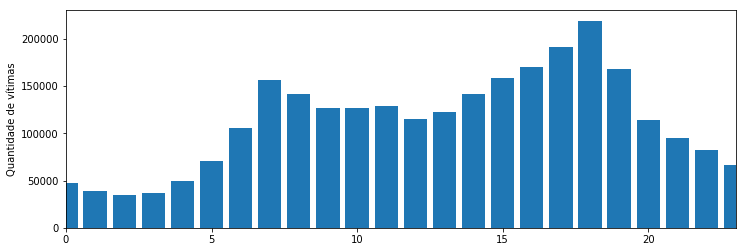

In [11]:
acidentes_por_hora = df.hora.value_counts()

plt.figure(figsize=(12,4))
plt.bar(np.arange(24), acidentes_por_hora.sort_index())
plt.ylabel('Quantidade de vítimas')
plt.xlim(0,23)

In [12]:
grouped = df.groupby(['hora', 'estado_fisico']).size().unstack()
grouped = grouped.sort_values(['óbito'], ascending=[False])
print('Os 05 horários com mais óbitos no trânsito:')
grouped.head()

Os 05 horários com mais óbitos no trânsito:


estado_fisico,ferido grave,ferido leve,ileso,óbito
hora,,,,
18,19004,51298,143130,5542
19,15792,40536,106054,5240
20,11553,28314,69815,4265
21,10021,24234,56744,3628
17,14524,44760,128215,3468


#### Quantidade de vítimas acidentadas por tipo de acidente

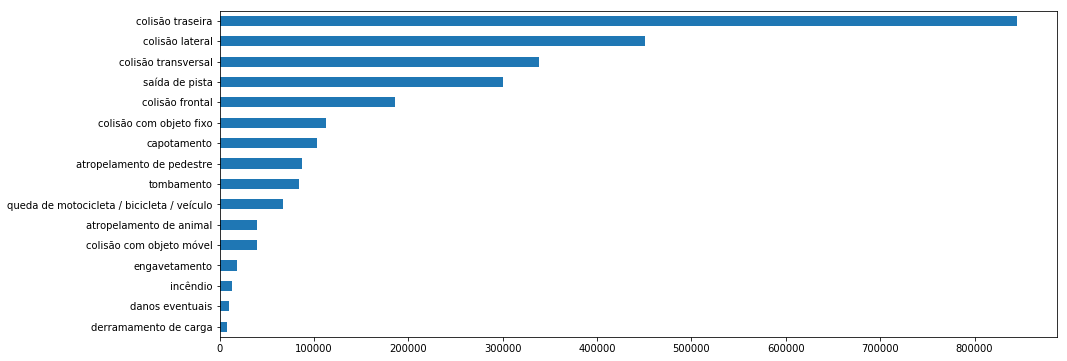

In [13]:
plt.figure(figsize=(15,6))
df['tipo_acidente'].value_counts(ascending=True).plot(kind='barh');

In [14]:
grouped = df.groupby(['tipo_acidente', 'estado_fisico']).size().unstack()
grouped = grouped.sort_values(['óbito'], ascending=[False])
grouped

estado_fisico,ferido grave,ferido leve,ileso,óbito
tipo_acidente,,,,
colisão frontal,36973,52854,74304,21341
atropelamento de pedestre,17279,19284,39957,10914
saída de pista,27267,110208,155079,7347
colisão transversal,35025,90962,206816,6142
colisão traseira,31469,126998,680025,6118
colisão lateral,22751,78796,344483,4458
capotamento,11314,46861,42769,2706
colisão com objeto fixo,8929,31784,70007,2414
tombamento,8009,38050,36485,1806


#### Quantidade de vítimas acidentadas por causas de acidentes

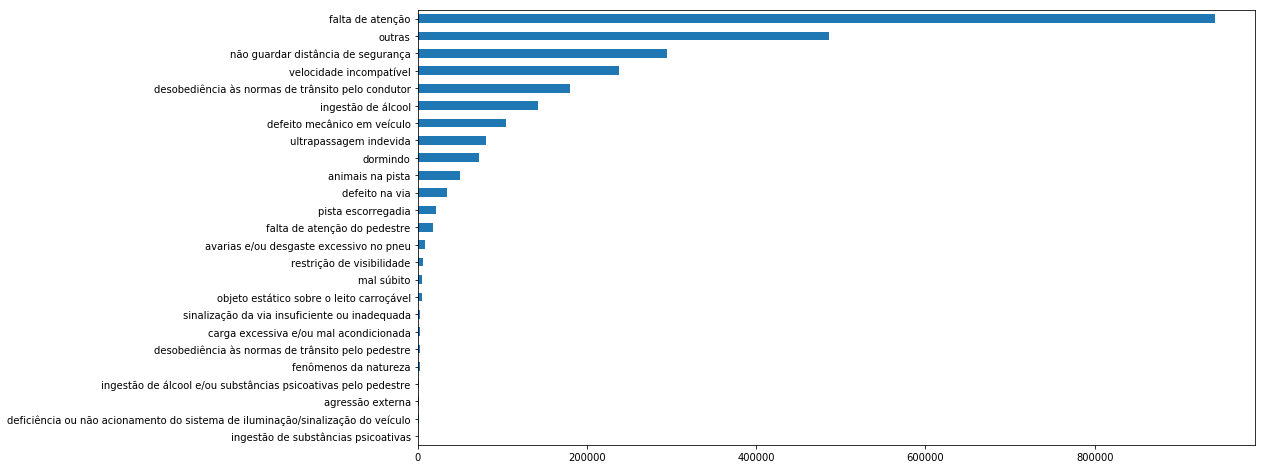

In [15]:
plt.figure(figsize=(15,8))
df['causa_acidente'].value_counts(ascending=True).plot(kind='barh');

In [16]:
grouped = df.groupby(['causa_acidente', 'estado_fisico']).size().unstack()
grouped = grouped.sort_values(['óbito'], ascending=[False])
grouped.head()

estado_fisico,ferido grave,ferido leve,ileso,óbito
causa_acidente,,,,
outras,43782,112090,312446,17927
falta de atenção,65964,211967,649945,14186
velocidade incompatível,25003,76497,127319,9312
ultrapassagem indevida,11081,21079,43496,5540
desobediência às normas de trânsito pelo condutor,20141,48786,105766,4960


#### Quantidade de vítimas acidentadas por faixa etária

Text(0, 0.5, 'Quantidade de vítimas')

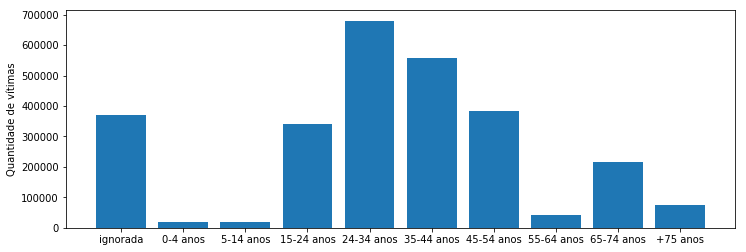

In [17]:
acidentes_por_faixa = df.faixa_etaria.value_counts()

plt.figure(figsize=(12,4))
plt.bar(np.arange(10), acidentes_por_faixa.sort_index())
ticks = plt.xticks(np.arange(10), ['ignorada', '0-4 anos', '5-14 anos', '15-24 anos', '24-34 anos', '35-44 anos', '45-54 anos', '55-64 anos', '65-74 anos', '+75 anos'])
plt.ylabel('Quantidade de vítimas')

In [18]:
grouped = df.groupby(['faixa_etaria', 'estado_fisico']).size().unstack()
grouped = grouped.sort_values(['óbito'], ascending=[False])
grouped.head()

estado_fisico,ferido grave,ferido leve,ileso,óbito
faixa_etaria,,,,
[25-34],54087,167117,444402,14584
[35-44],40034,118600,386578,12931
[45-54],27375,76955,269692,10196
[15-24],42060,127021,161815,9900
[55-64],15309,43762,149905,6743


#### Quantidade de vítimas acidentadas por br

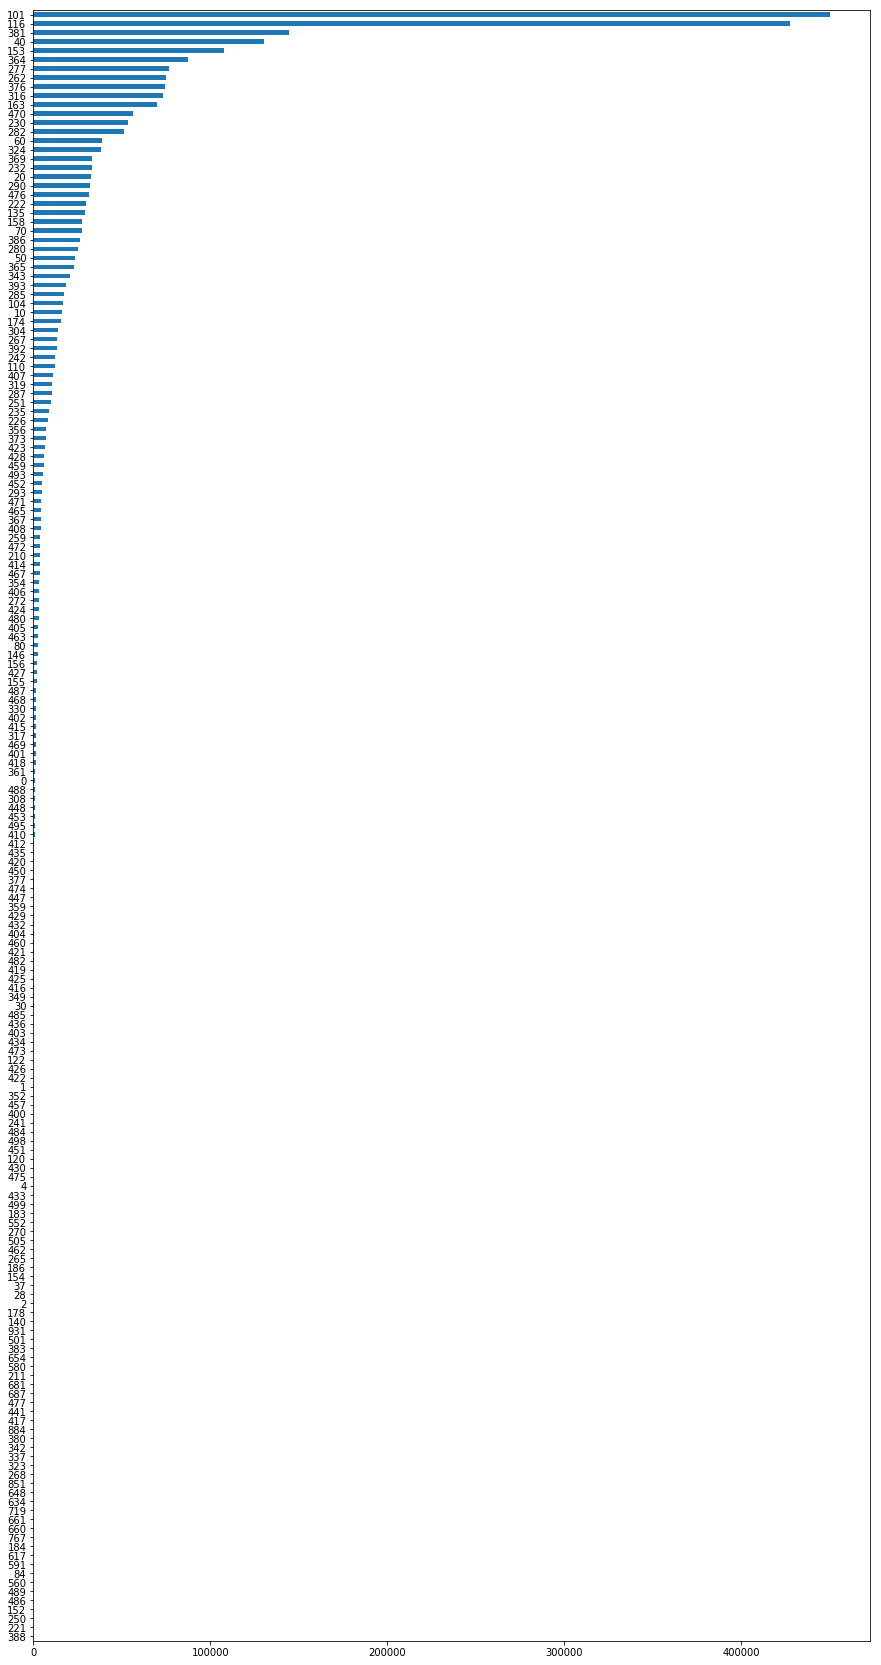

In [19]:
plt.figure(figsize=(15,30))
df['br'].value_counts(ascending=True).plot(kind='barh');

#### Quantidade de vítimas acidentadas por condição meteorológica

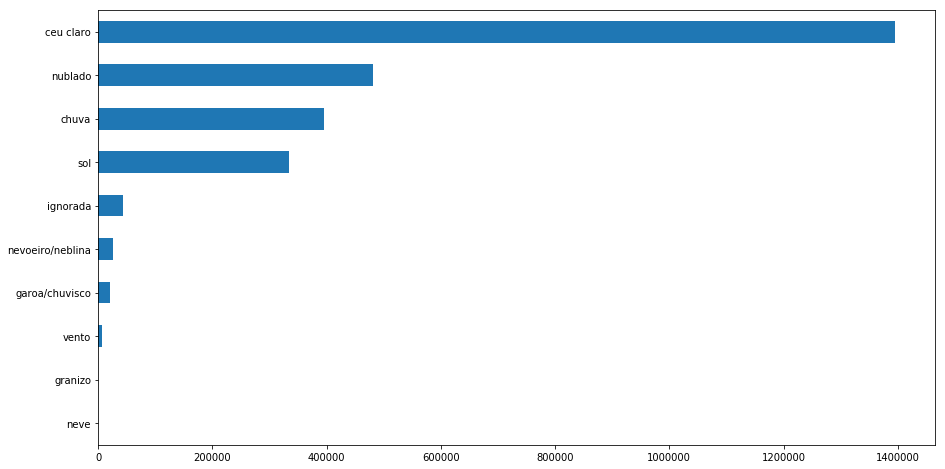

In [20]:
plt.figure(figsize=(15,8))
df['condicao_metereologica'].value_counts(ascending=True).plot(kind='barh');

#### Quantidade de vítimas acidentadas por sexo

Text(0, 0.5, 'Quantidade de vítimas')

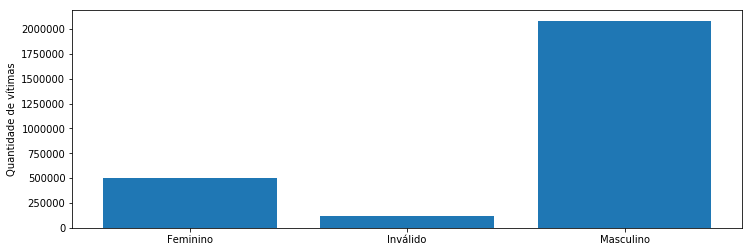

In [21]:
acidentes_por_sexo = df.sexo.value_counts()

plt.figure(figsize=(12,4))
plt.bar(np.arange(3), acidentes_por_sexo.sort_index())
ticks = plt.xticks(np.arange(3), ['Feminino', 'Inválido', 'Masculino'])
plt.ylabel('Quantidade de vítimas')

In [22]:
grouped = df.groupby(['sexo', 'ano']).size().unstack()
grouped

ano,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
sexo,,,,,,,,,,
feminino,65919,64666,68769,63788,51727,45842,44057,37212,37155,21587
inválido,15158,14283,15177,14099,10703,8849,13190,10290,10336,7564
masculino,331205,317962,321874,290642,206622,161571,147169,117299,114781,75231


#### Quantidade de vítimas acidentadas por tipo de veículo

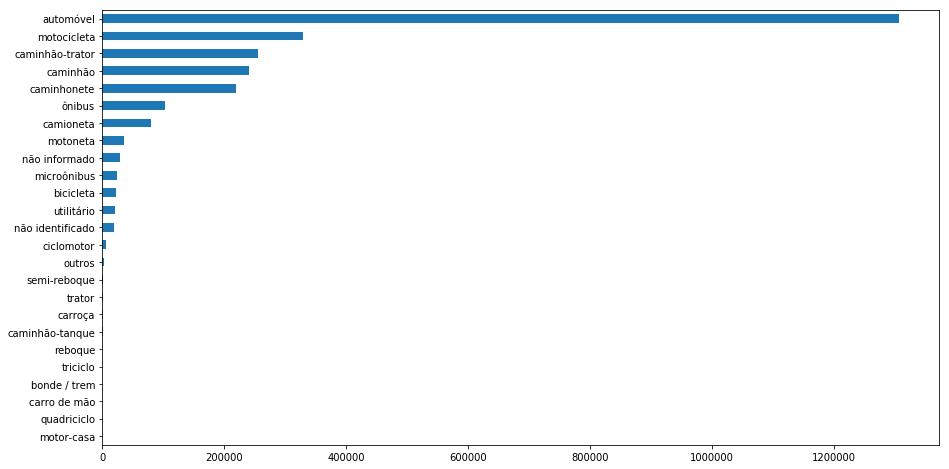

In [23]:
plt.figure(figsize=(15,8))
df['tipo_veiculo'].value_counts(ascending=True).plot(kind='barh');

#### Quantidade de vítimas acidentadas por tipo envolvido

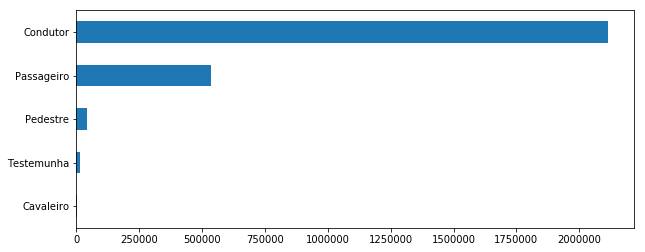

In [24]:
plt.figure(figsize=(10,4))
df['tipo_envolvido'].value_counts(ascending=True).plot(kind='barh');

In [25]:
grouped = df.groupby(['tipo_envolvido', 'estado_fisico']).size().unstack()
grouped = grouped.sort_values(['óbito'], ascending=[False])
grouped.head()

estado_fisico,ferido grave,ferido leve,ileso,óbito
tipo_envolvido,,,,
Condutor,132469.0,386667.0,1555832.0,39005.0
Passageiro,72770.0,260929.0,183106.0,17895.0
Pedestre,15931.0,14296.0,1683.0,10828.0
Cavaleiro,142.0,192.0,158.0,64.0
Testemunha,NaN,NaN,12759.0,1.0
